``` py

!pip install takeHomeTest
import takeHomeTest

!pip install time
from time import oneWeek as panic

panic.dump(takeHomeTest)


print("Welcome to your take home final!\n")
```

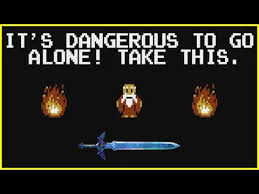




## ------------------------------------------- The Legend of Python --------------------------------------------
**Lore**

In the Kingdom of Pyrovia, all nations once traded in harmony. But since the Shattering of the Global APIs, the knowledge of currency exchange — locked away in XML scrolls — has scattered across the timelines. These scrolls reside in a mysterious repository known only as floatrates.com.

The High Council of Programmers has summoned you (and only you), young code-wielder, to begin your final trial. It is divided into 2 parts.
* Quest 1 (50xp): Retrieving the scrolls of time - Threading and Json save and parsing
* Quest 2 (50xp): Decipher the scrolls - Perform EDA on the data.

------ ------ ------ ------ Extra credit ------ ------ ------ ------ 
* Side Quest 1 (10xp*): Lay down seeds for those that follow - create error logs 
* Side Quest 2 (10xp*): The Quest of reflection  - Use profiling on your code to fully understand it 

*any points over 100% will be rolled over into your final grade. 

I may not have time to run all of your code so make sure you very clearly take notes and communicate successes, issues, and lessons learned. 
Please stay off Chat GPT and stack overflow (and like). You should have most everything you need in the notes. 

--------------------------------------------
# Quest 1 (50 xp): Retrieving the Scrolls of Time 
Retrieve historical exchange rate data from floatrates.com for one of the (Ideally randomly pick) 52 available currencies, starting from the first record on May 4, 2011, until the present day.

- You may store the data as-is in XML, or convert it to JSON, you may use the supplied code below as a starter. 

- Organize each currency into its own directory.

- Ensure your code is modular, maintainable, and robust against timeouts or malformed entries.

## Notes from the Grand Master 
* Threading is your ally. But do not burn out your ally as they have limited resources. You may use the threading or multi-core to parallelize downloads — but mind the server’s load. Around 10 threads is wise. 
    - You should have around 5040 queries.

* XML Scrolls is a new and unfamiliar beast. Therefore takeing on this beast will wield 5 extra experience points. You will not be penalized for choosing to use JSON

*  Use the Save. Nothing is worse than losing experience you have already gained. Save the raw XML (or converted JSON) using timestamped (in my example below) files so you do not need to look it up again. Ie. If you put in a start date and your program has already read that data it should not pull that date again. (it would be a good idea to delete your data and run it top to bottom before final submission)

* Design gracefully. Structure your project with clear modules: downloader.py, parser.py, and so on. 

* Log your quest progress in your quest book to show the Grand Master what you learned this is very important. 


--------------------------------------------

In [ ]:
!pip install xmltodict

In [ ]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]

In [ ]:
import requests
import xmltodict
import json
import random

# URL of the XML data
date = "2011-05-04"
base = random.choice(ratesForBase)
url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
print(url)
# Fetch the XML data
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the XML data to a Python dictionary
data_dict = xmltodict.parse(response.text)

# Convert the dictionary to a JSON string
json_data = json.dumps(data_dict, indent=4)

# Print the JSON data
print(json_data)

# Optionally, write the JSON data to a file
with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
    json_file.write(json_data)


--------------------------------------------
# Quest 2 (50 XP): Decipher the scrolls – Exploratory Data Analysis

Once the scrolls have been retrieved their knowledge remains unrefined there patterns hidden, trends veiled. Your task now is to become the Seer of Exchange, the one who can read the currencies’ fates through the lens of data.
8
Perform Exploratory Data Analysis (EDA) on the dataset you collected in Quest 1. 
- Aggregate and visualize trends in exchange rate over time for at least 5 major currencies (e.g., USD, EUR, GBP, JPY, CNY).

- Identify periods of volatility — perhaps during economic upheaval

- Generate at least multiple visualizations using seaborn:

- Log your quest progress in your quest book to show the Grand Master what you learned this is very important. some examples of observations are:
    - Anomalies, seasonal patterns, or economic events
    - Currencies with the most/least stability
    - Any interesting correlations between currencies


## Notes from the Grand Master 
- All of your work in this section should be in your jupyter notebook. 

- It might be helpful to use  google to reveal how economic events affected currency. Use Google News or economic calendars to correlate real-world events to exchange rate spikes or dips.


--------------------------------------------


# Side Quest 1 (10 XP): Lay Down Seeds for Those Who Follow – Logging

Even the greatest explorer must leave breadcrumbs for those who walk the path after them. Here you will construct an error log system, a journal that captures both triumphs and catastrophes.

Implement a robust logging system throughout your codebase to monitor:
- Successful currency downloads
- Parsing attempts and failures
- Skipped downloads (due to saved data or time out)
- Connection errors

## Notes from the Grand Master
- You do not need to do log hierarchy 
- Use log levels: INFO for progress, WARNING for skips, ERROR for failures



--------------------------------------------


# Side Quest 2 (10 XP): The quest of Reflection – Code Profiling

The final challenge for any Adventure is introspection — learning the nature of one's own power. In this side quest, you will profile your code, to discover its bottlenecks, inefficiencies, and optimization opportunities.

Use profiling tools to evaluate:
- Which functions are taking the most time
- How threads/processes are behaving
- Whether I/O is a bottleneck

*A random vendor appears* His invintory shows:
- A Profiler function - cProfile or Profile 
- A time module - timeit for micro-benchmarks
- A line profiler - line_profiler

# Quest 1


In [1]:
import requests
import threading
import xml.etree.ElementTree as ET
import json
import os
import logging


In [12]:
# SQ1 Log
logging.basicConfig(filename='error_log.log', level=logging.ERROR)

def fetch_and_save(currency_code):
    try:
        url = f"http://www.floatrates.com/daily/{currency_code}.xml" #usd conversion rates
        response = requests.get(url)
        response.raise_for_status()
        root = ET.fromstring(response.content)
        
        data = []
        for item in root.findall('item'):
            currency = {
                'targetCurrency': item.find('targetCurrency').text,
                'exchangeRate': float(item.find('exchangeRate').text),
                'date': item.find('date').text
            }
            data.append(currency)
        
        with open(f'{currency_code}_rates.json', 'w') as f:
            json.dump(data, f, indent=2)
    except Exception as e:
        logging.error(f"Error fetching {currency_code}: {e}")

currencies = ['usd', 'eur', 'aud', 'cad', 'aud']
threads = []

for curr in currencies:
    t = threading.Thread(target=fetch_and_save, args=(curr,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()


In [14]:
currency_code = 'usd'
with open(f'{currency_code}_rates.json', 'w') as f:
    usd_data = json.load(f)
print(usd_data[0]) 

UnsupportedOperation: not readable

In [15]:

# SQ1 Log
logging.basicConfig(filename='error_log.log', level=logging.ERROR,
                    format="%(asctime)s %(levelname)s: %(message)s")

def fetch_and_save(currency_code):
    try:
        url = f"http://www.floatrates.com/daily/{currency_code}.xml"
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        root = ET.fromstring(response.content)
        data = []
        for item in root.findall('item'):
            data.append({
                'targetCurrency': item.findtext('targetCurrency'),
                'exchangeRate': float(item.findtext('exchangeRate')),
                'date': item.findtext('date')
            })

        # one file per currency with key:value traget conversion numbers
        with open(f'{currency_code}_rates.json', 'w') as f:
            json.dump(data, f, indent=2)

    except Exception as e:
        logging.error(f"Error fetching {currency_code}: {e}")

currencies = ['usd', 'eur', 'aud', 'cad', 'chf']
threads = []

for curr in currencies:
    t = threading.Thread(target=fetch_and_save, args=(curr,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

#READ dnot write  
currency_code = 'usd'
with open(f'{currency_code}_rates.json', 'r') as f:   #  ← 'r' !
    usd_data = json.load(f)



print(usd_data[0])          # sanity-check: first record
print(f"Loaded {len(usd_data)} USD exchange rows.")


{'targetCurrency': 'AUD', 'exchangeRate': 1.55829945, 'date': None}
Loaded 146 USD exchange rows.


Works but saves date as null

In [19]:
# SQ1 Log
logging.basicConfig(filename='error_log.log', level=logging.ERROR,
                    format="%(asctime)s %(levelname)s: %(message)s")

def fetch_and_save(currency_code):
    try:
        url = f"http://www.floatrates.com/daily/{currency_code}.xml"
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        root = ET.fromstring(response.content)

        last_build_date = root.findtext('lastBuildDate')

        data = []
        for item in root.findall('item'):
            data.append({
                'targetCurrency': item.findtext('targetCurrency'),
                'exchangeRate': float(item.findtext('exchangeRate')),
                'date': last_build_date
            })

        # one file per currency with key:value traget conversion numbers
        with open(f'{currency_code}_rates.json', 'w') as f:
            json.dump(data, f, indent=2)

    except Exception as e:
        logging.error(f"Error fetching {currency_code}: {e}")

currencies = ['usd', 'eur', 'aud', 'cad', 'chf']
threads = []

for curr in currencies:
    t = threading.Thread(target=fetch_and_save, args=(curr,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

#READ dnot write  
currency_code = 'usd'
with open(f'{currency_code}_rates.json', 'r') as f:   #  ← 'r' !
    usd_data = json.load(f)



print(usd_data[0])          # sanity-check: first record
print(f"Loaded {len(usd_data)} USD exchange rows.")

{'targetCurrency': 'AUD', 'exchangeRate': 1.55829945, 'date': 'Fri, 16 May 2025 23:55:08 GMT'}
Loaded 146 USD exchange rows.


Works but saves only from today due to website used

# EDA

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_json("./usd_rates.json")
df.head()

,targetCurrency,exchangeRate,date
0,AUD,1.558299,2025-05-16 23:55:08+00:00
1,CAD,1.396317,2025-05-16 23:55:08+00:00
2,CHF,0.836492,2025-05-16 23:55:08+00:00
3,CNY,7.204817,2025-05-16 23:55:08+00:00
4,EUR,0.893389,2025-05-16 23:55:08+00:00


In [25]:
# Show basic info and summary
print("DataFrame Info:")
print(df.info())
print("\nSummary Statistics:")
print(df['exchangeRate'].describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   targetCurrency  146 non-null    object             
 1   exchangeRate    146 non-null    float64            
 2   date            146 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 3.6+ KB
None

Summary Statistics:
count      146.000000
mean      1996.967975
std       8772.141716
min          0.307397
25%          4.151174
50%         36.720207
75%        294.280099
max      89429.545455
Name: exchangeRate, dtype: float64


In [27]:
# Top 10 highest and lowest exchange rates
print("\nTop 10 Highest Exchange Rates:")
print(df.nlargest(10, 'exchangeRate')[['targetCurrency', 'exchangeRate']])

print("\nTop 10 Lowest Exchange Rates:")
print(df.nsmallest(10, 'exchangeRate')[['targetCurrency', 'exchangeRate']])


Top 10 Highest Exchange Rates:
    targetCurrency  exchangeRate
39             LBP  89429.545455
144            IRR  41972.222222
17             VND  25928.346616
88             LAK  20429.694479
7              IDR  16441.150684
145            SYP  12981.099656
132            UZS  12959.862426
76             GNF   8622.268894
113            PYG   7987.563771
94             MGA   4518.509916

Top 10 Lowest Exchange Rates:
    targetCurrency  exchangeRate
87             KWD      0.307397
56             BHD      0.376094
108            OMR      0.384492
38             JOD      0.709035
5              GBP      0.752066
74             GIP      0.752814
2              CHF      0.836492
4              EUR      0.893389
60             BSD      1.000000
109            PAB      1.000000


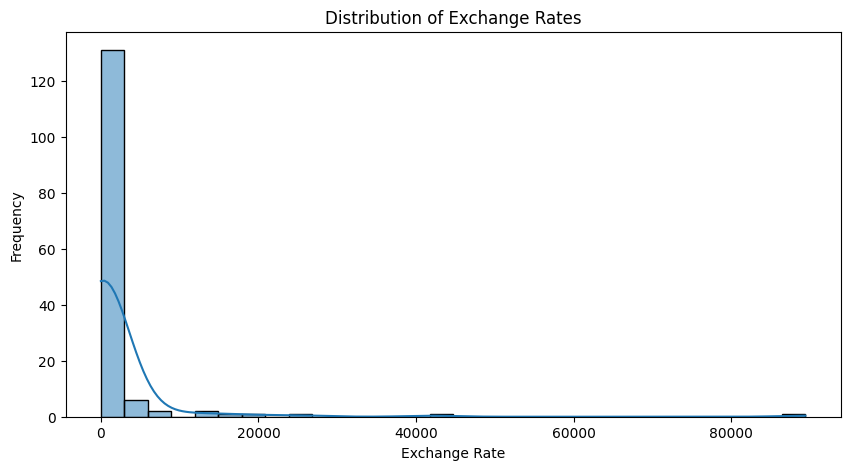

In [28]:
# Distribution plot of exchange rates
plt.figure(figsize=(10, 5))
sns.histplot(df['exchangeRate'], bins=30, kde=True)
plt.title("Distribution of Exchange Rates")
plt.xlabel("Exchange Rate")
plt.ylabel("Frequency")
plt.show()

Makes sense infrequent exchanges in high volume

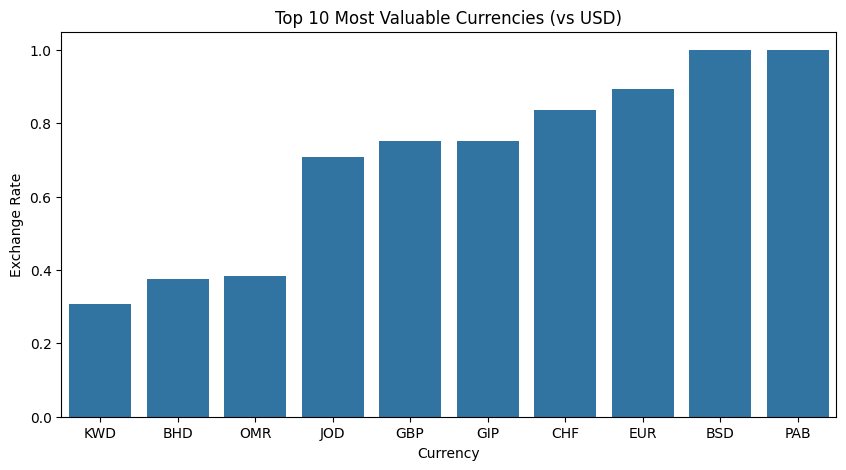

In [30]:
# Bar plot of the top 10 most valuable currencies (lowest exchange rate)
top10_valuable = df.nsmallest(10, 'exchangeRate')
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_valuable, x='targetCurrency', y='exchangeRate')
plt.title("Top 10 Most Valuable Currencies (vs USD)")
plt.xlabel("Currency")
plt.ylabel("Exchange Rate")
plt.show()


10 most expensive curr in line with countries exporting high amounts of oil until GIP which is connected to GBP explains equal numbers

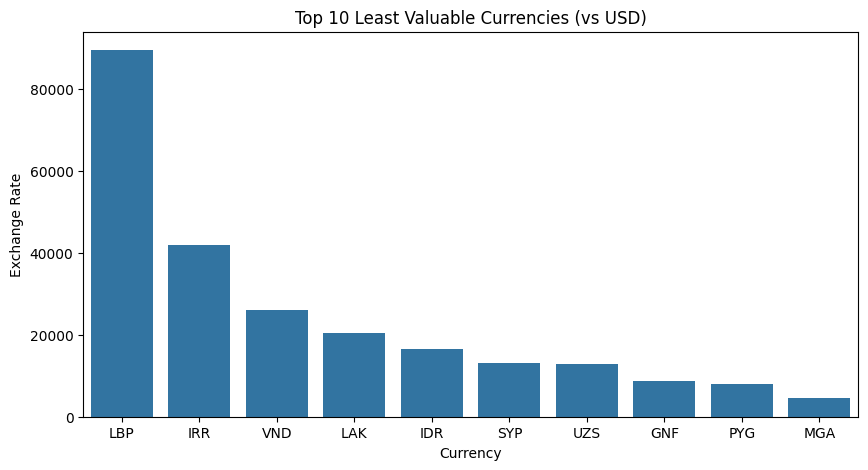

In [29]:
# Bar plot of the 10 least valuable currencies (highest exchange rate)
top10_least = df.nlargest(10, 'exchangeRate')
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_least, x='targetCurrency', y='exchangeRate')
plt.title("Top 10 Least Valuable Currencies (vs USD)")
plt.xlabel("Currency")
plt.ylabel("Exchange Rate")
plt.show()

In [33]:
df.describe()

,exchangeRate
count,146.000000
mean,1996.967975
std,8772.141716
min,0.307397
25%,4.151174
50%,36.720207
75%,294.280099
max,89429.545455


In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

ValueError: could not convert string to float: 'AUD'

<Figure size 1000x600 with 0 Axes>

c:\Users\spide\anaconda3\envs\ETE4990\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\spide\anaconda3\envs\ETE4990\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


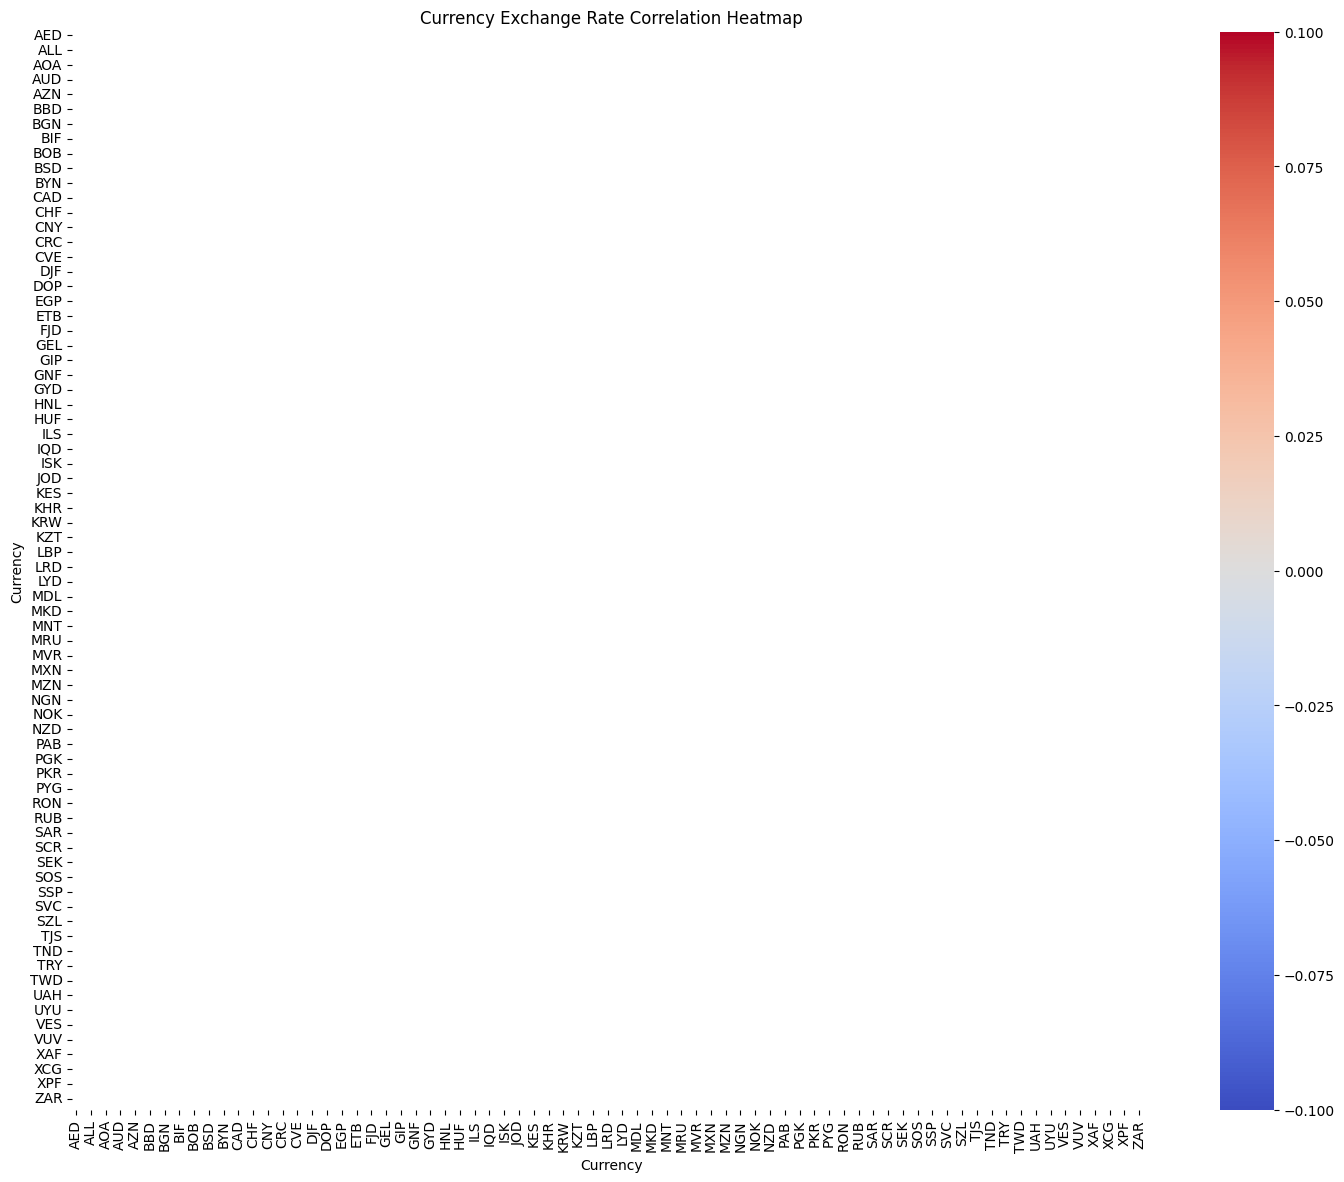

In [35]:
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, square=True, linewidths=0.5)
plt.title("Currency Exchange Rate Correlation Heatmap")
plt.xlabel("Currency")
plt.ylabel("Currency")
plt.show()

In [37]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "USD", y = "AUD", data = df, legend=False)
plt.show()

ValueError: Could not interpret value `USD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x800 with 0 Axes>

#Error Log


In [ ]:
import logging

logging.basicConfig(
    filename='error_log.log',
    level=logging.ERROR,
    format="%(asctime)s %(levelname)s: %(message)s"
)

try:
    with open('usd_rates.json', 'r') as f:
        usd_data = json.load(f)
except Exception as e:
    logging.error(f"Failed to load usd_rates.json: {e}")

try:
    df = pd.read_json("./usd_rates.json")
except Exception as e:
    logging.error(f"Failed to read usd_rates.json into DataFrame: {e}")

try:
    check for missing or broken garbage data
    if df.isnull().values.any():
        logging.warning("DataFrame contains missing values.")
except Exception as e:
    logging.error(f"Error during DataFrame validation: {e}")